# => MOVIE RATING PREDICTION WITH PYTHON

# Import the liberery

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the data set

In [15]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [17]:
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

# Basic info

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [22]:
print(df.isnull().sum())  # Check for missing values

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [26]:
df = df.dropna(subset=['Rating']) # Drop rows with missing target (IMDb rating)

# Fill remaining missing values (if any)

In [32]:
df = df.fillna("Unknown")

# Check again to confirm

In [35]:
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [37]:
# Show cleaned data
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


# Now we perform EDA

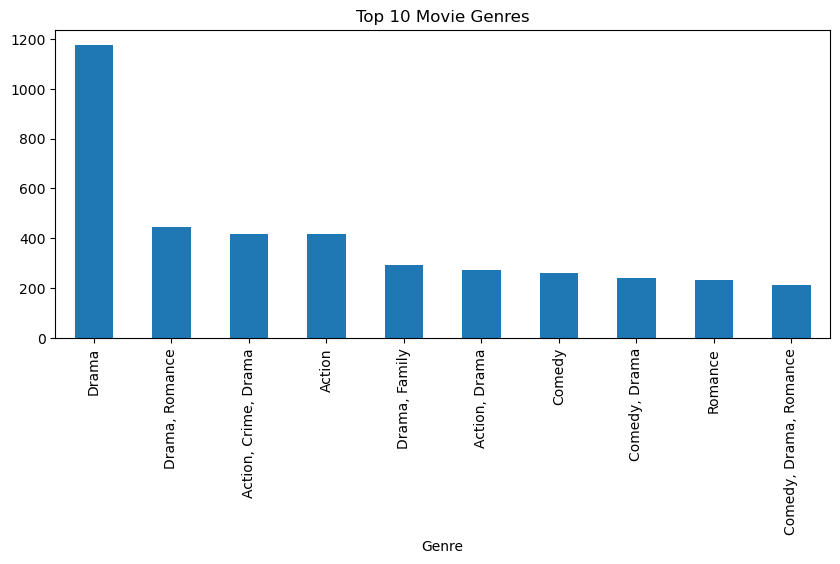

In [40]:
# Top genres
plt.figure(figsize=(10,4))
df['Genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.show()

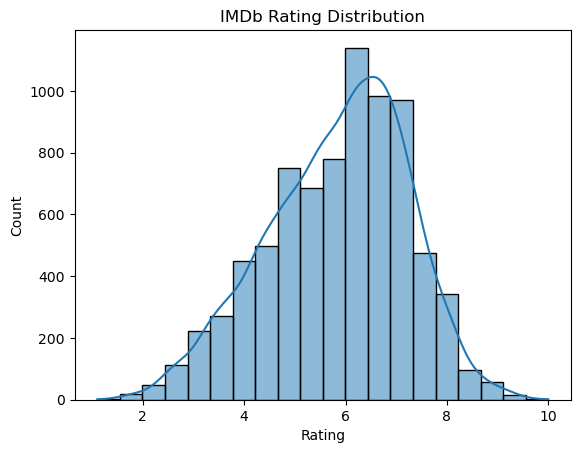

In [42]:
# Distribution of Ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("IMDb Rating Distribution")
plt.show()

# perform Feature Engineering

In [49]:
# Select relevant features from available data
data = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']].copy()

In [51]:
# Encode categorical columns
le = LabelEncoder()
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data[col] = le.fit_transform(data[col].astype(str))  # ensure all are strings


In [53]:
# Check processed data
data.head()

,Genre,Director,Actor 1,Actor 2,Actor 3,Rating
1,268,811,1782,2815,377,7.0
3,207,1749,1589,890,2572,4.4
5,177,2005,508,85,2449,4.7
6,331,2643,931,1388,3030,7.4
8,367,174,2521,1461,1205,5.6


# Perform Train-Test Split

In [56]:
X = data.drop('Rating', axis=1)
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Now we Build Regression Model

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)    # Predict


# Now we Evaluate the Model

In [62]:
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 Score: 0.035450225863035256
Mean Squared Error: 1.793238025494594


#  Actual vs Predicted

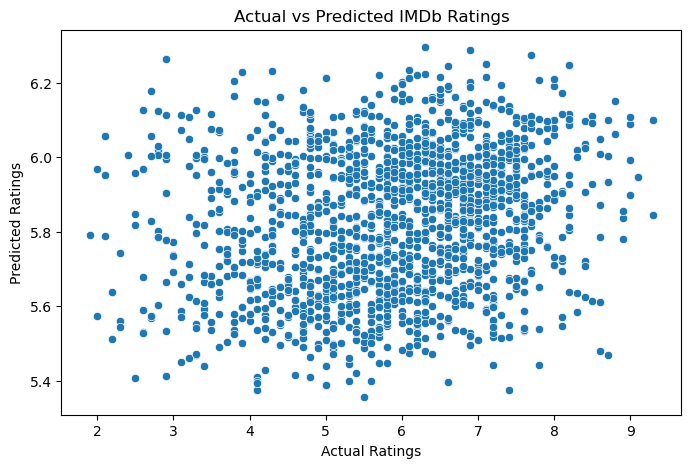

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted IMDb Ratings")
plt.show()